<a href="https://colab.research.google.com/github/ghosesuvendu/dataScience/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Data Science with Python - Machine Learning Lab


## 1. Regression Case Study -

## A research was conducted recently by state government to collect some health specific statistics 
## for different cities from 5 different states, the objective of the research was to collect the health and 
## medical facilities specific attributes of the cities which directly/indirectly impact the overall health 
## status of the city.

## the objective is to find the attributes and their relation with death rate in order to take 
## the necessary steps to prevent higher death rate.


#### 1. Data Processing ####
#### 1.1 Get the data
### data : health_data for different cities of 5 states


In [1]:

import os
import sys

os.path.dirname(sys.executable)

os.getcwd()

'/content'

In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()



Saving Health_data_new.csv to Health_data_new.csv


In [2]:
# Importing the dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['Health_data_new.csv']))

In [3]:
data.head(10)

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136
2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441
3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358
4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668
5,1005,s102,422.307743,483.192599,17.537036,40.917961,10.665247
6,1006,s102,687.154792,802.260299,21.988435,32.012616,8.349656
7,1007,s104,616.286636,644.735179,19.966891,34.789638,9.158967
8,1008,s101,453.760266,569.818951,16.961098,46.599838,10.757125
9,1009,s105,724.033127,811.565377,21.084743,28.423784,7.138971


In [ ]:
## Case Study 1 - Predict death_rate
### dependent variable : death_rate
### independent variables : doctor_availability_rate,hospital_availability_rate,
### annual_per_capita,population_density, State

In [4]:
data.info()

data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   State                       2000 non-null   object 
 2   doctor_availability_rate    2000 non-null   float64
 3   hospital_availability_rate  2000 non-null   float64
 4   annual_per_capita           2000 non-null   float64
 5   population_density          2000 non-null   float64
 6   death_rate                  1967 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 109.5+ KB


,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1967.000000
mean,1999.500000,584.579841,663.231582,18.222888,37.277126,9.290993
std,577.494589,144.085315,151.363999,3.595416,7.145640,1.724680
min,1000.000000,44.155200,86.663459,4.009732,10.894868,3.186223
25%,1499.750000,509.065656,577.497153,16.229899,33.401743,8.322182
50%,1999.500000,593.901162,676.518731,18.491890,37.778280,9.437314
75%,2499.250000,676.737022,764.318146,20.516293,41.861463,10.376068
max,2999.000000,952.193953,1068.699512,28.095823,54.896516,13.316359


In [5]:
### 1.2 Null Data Handling

pd.isna(data)


,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


In [7]:
pd.isna(data.death_rate)




0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: death_rate, Length: 2000, dtype: bool

In [8]:
pd.isna(data.death_rate).value_counts()

False    1967
True       33
Name: death_rate, dtype: int64

In [10]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


City_ID                       1999.500000
doctor_availability_rate       584.579841
hospital_availability_rate     663.231582
annual_per_capita               18.222888
population_density              37.277126
death_rate                       9.290993
dtype: float64

In [11]:
## Handling missing values 
data.mean()['death_rate']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


9.290992592647687

In [12]:
data['death_rate'] = data['death_rate'].fillna(data.mean()['death_rate'])

pd.isna(data.death_rate).value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


False    2000
Name: death_rate, dtype: int64

In [13]:
object_cols = list(data.select_dtypes(include=['category','object']))
object_cols

['State']

In [14]:
#### 1.2  Categorical Data Handling using One hot Encoding
data.State.value_counts()

s103    426
s102    407
s104    394
s101    392
s105    381
Name: State, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

ohe = OneHotEncoder(sparse=False)

State_le = le.fit_transform(data.State)

State_le

array([3, 4, 0, ..., 0, 4, 0])

In [16]:
State_le = State_le.reshape(len(State_le),1)


State_ohe = ohe.fit(State_le)

State_New = State_ohe.transform(State_le)

State_New


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [17]:
State_New = pd.DataFrame(State_New)

State_New.columns = ['s1','s2','s3','s4','s5']

State_New

,s1,s2,s3,s4,s5
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,1.0
1996,0.0,0.0,0.0,0.0,1.0
1997,1.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,1.0


In [18]:
data = data.join(State_New[['s1','s2','s3','s4']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   State                       2000 non-null   object 
 2   doctor_availability_rate    2000 non-null   float64
 3   hospital_availability_rate  2000 non-null   float64
 4   annual_per_capita           2000 non-null   float64
 5   population_density          2000 non-null   float64
 6   death_rate                  2000 non-null   float64
 7   s1                          2000 non-null   float64
 8   s2                          2000 non-null   float64
 9   s3                          2000 non-null   float64
 10  s4                          2000 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 172.0+ KB


In [ ]:
data.head()

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,s1,s2,s3,s4
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700,0.0,0.0,0.0,1.0
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136,0.0,0.0,0.0,0.0
2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441,1.0,0.0,0.0,0.0
3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358,0.0,0.0,0.0,1.0
4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668,0.0,0.0,1.0,0.0


In [ ]:
data.drop('State',axis=1,inplace=True)

In [ ]:
data.head()

,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,s1,s2,s3,s4
0,1000,773.177527,823.579167,21.622655,27.606263,7.448700,0.0,0.0,0.0,1.0
1,1001,525.493029,607.302537,19.123286,40.786864,10.081136,0.0,0.0,0.0,0.0
2,1002,574.615664,627.912321,17.670255,41.327670,9.795441,1.0,0.0,0.0,0.0
3,1003,593.601517,640.842500,19.234267,34.235168,9.545358,0.0,0.0,0.0,1.0
4,1004,462.664965,533.419684,16.171985,44.218356,10.649668,0.0,0.0,1.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


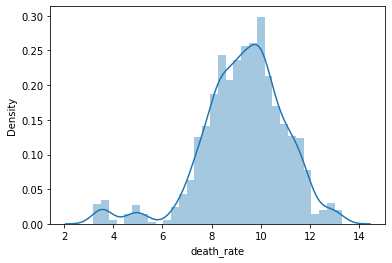

In [19]:

#### 1.3 Splitting data into Training and Test Data Sets

import seaborn as sns

sns.distplot(data.death_rate)


In [20]:

import sklearn

from sklearn.model_selection import train_test_split


In [21]:
data.info()

data_X = data.iloc[:,[0,1,2,3,4,6,7,8,9]]

data_y = data[:]['death_rate']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   State                       2000 non-null   object 
 2   doctor_availability_rate    2000 non-null   float64
 3   hospital_availability_rate  2000 non-null   float64
 4   annual_per_capita           2000 non-null   float64
 5   population_density          2000 non-null   float64
 6   death_rate                  2000 non-null   float64
 7   s1                          2000 non-null   float64
 8   s2                          2000 non-null   float64
 9   s3                          2000 non-null   float64
 10  s4                          2000 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 172.0+ KB


In [ ]:
data_y

0        7.448700
1       10.081136
2        9.795441
3        9.545358
4       10.649668
          ...    
1995    11.028052
1996    10.111233
1997     9.069662
1998    10.060605
1999     9.749643
Name: death_rate, Length: 2000, dtype: float64

In [22]:

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=100)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 773 to 1544
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     1400 non-null   int64  
 1   State                       1400 non-null   object 
 2   doctor_availability_rate    1400 non-null   float64
 3   hospital_availability_rate  1400 non-null   float64
 4   annual_per_capita           1400 non-null   float64
 5   death_rate                  1400 non-null   float64
 6   s1                          1400 non-null   float64
 7   s2                          1400 non-null   float64
 8   s3                          1400 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 109.4+ KB


In [23]:
type(X_train)

pandas.core.frame.DataFrame

In [24]:
y_train


773      8.894438
1991    10.416377
1529    11.522764
746      9.062088
78       9.616311
          ...    
1879    11.761173
1895     9.071368
1859     8.688022
792      7.645528
1544     8.793434
Name: death_rate, Length: 1400, dtype: float64

In [25]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1025 to 1251
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     600 non-null    int64  
 1   State                       600 non-null    object 
 2   doctor_availability_rate    600 non-null    float64
 3   hospital_availability_rate  600 non-null    float64
 4   annual_per_capita           600 non-null    float64
 5   death_rate                  600 non-null    float64
 6   s1                          600 non-null    float64
 7   s2                          600 non-null    float64
 8   s3                          600 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 46.9+ KB


In [26]:
y_test

1025    10.352387
1208     9.614960
1055     8.223766
367      7.471097
815      9.245636
          ...    
1718     9.577986
1687    10.067912
210      9.437314
376      8.629955
1251    10.882928
Name: death_rate, Length: 600, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


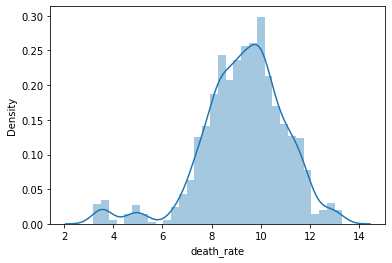

In [27]:
sns.distplot(data.death_rate)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


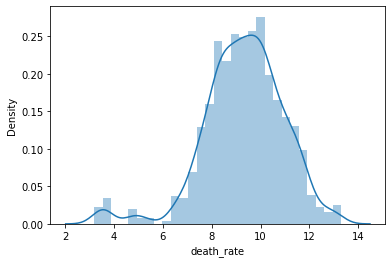

In [28]:
sns.distplot(y_train)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


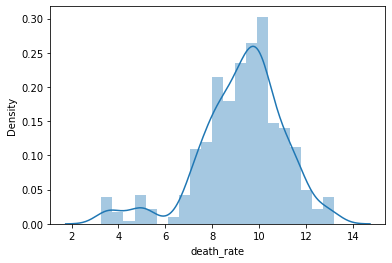

In [29]:
sns.distplot(y_test)

In [ ]:

#### 2 building ML Models

## 2.1 Multiple Linear Regression

### dependent variable : death_rate
### independent variables : doctor_availability_rate,hospital_availability_rate,
### annual_per_capita,population_density, state (s1,s2,s3,s4,s5)

## Death Rate(y) = B0 + B1*doctor_availability_rate + B2*hospital_availability_rate +
## B3*annual_per_capita + B4*population_density + B5*s1 + B6*s2 +B7*s3 + B8*s4


## Feature Selection - Checking Correlation to get perfect set of independent variables


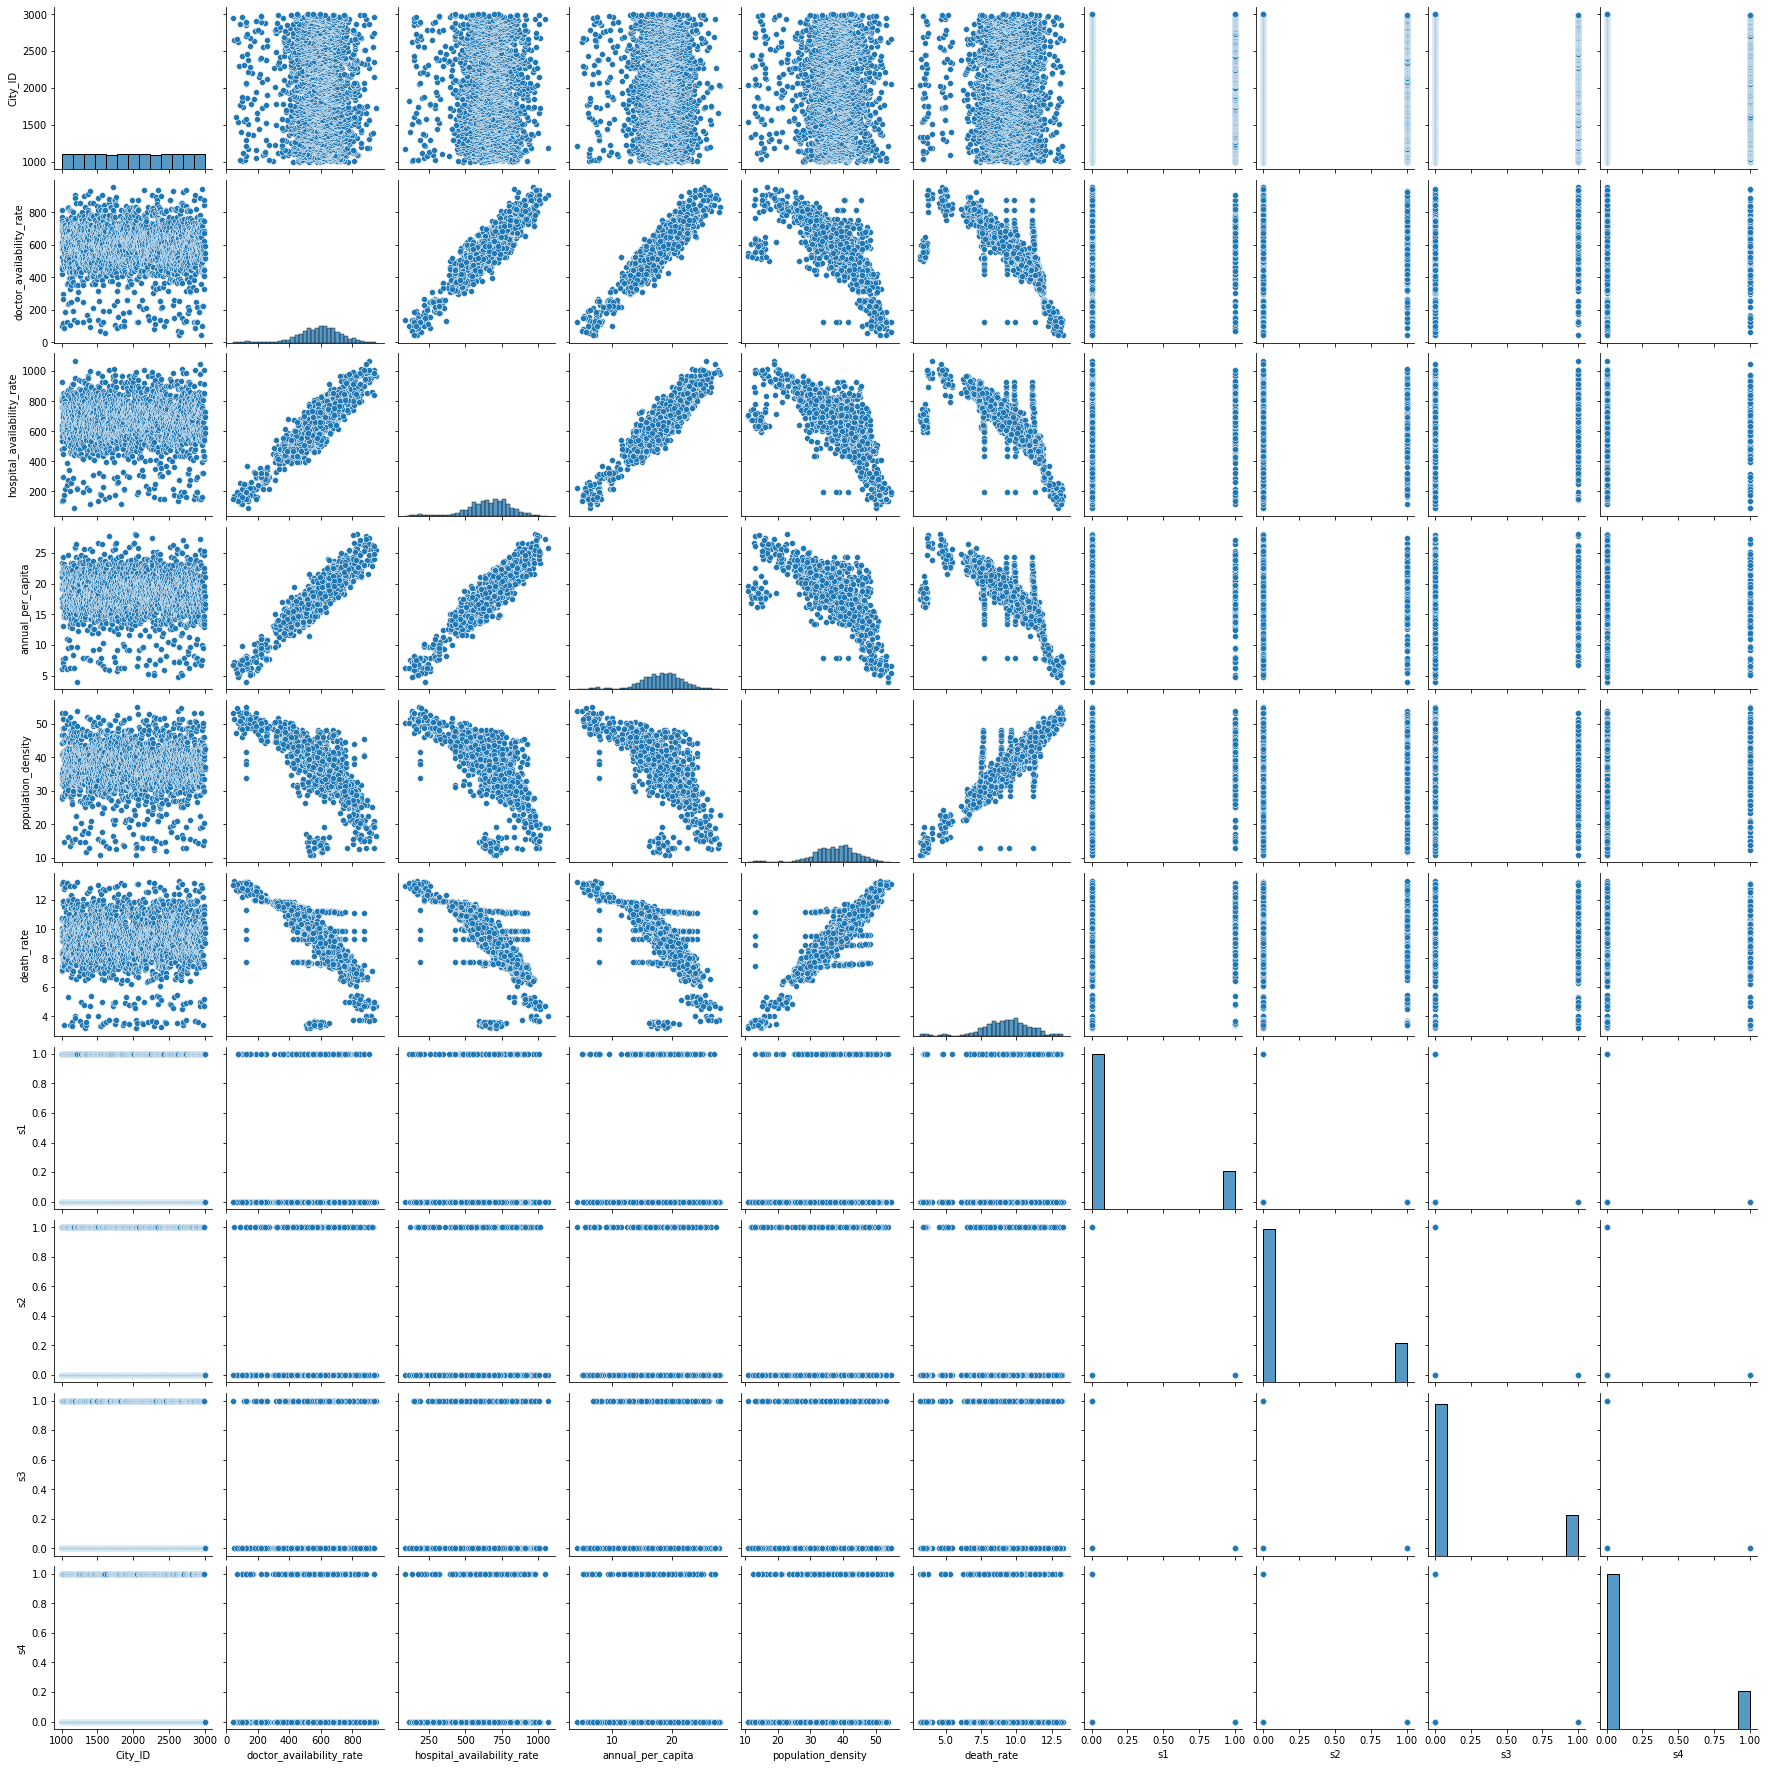

In [30]:

import seaborn as sns

sns.pairplot(data)

cr = data.corr()



In [31]:
cr['death_rate']

City_ID                       0.007108
doctor_availability_rate     -0.767827
hospital_availability_rate   -0.775418
annual_per_capita            -0.768331
population_density            0.898443
death_rate                    1.000000
s1                            0.005175
s2                            0.000067
s3                           -0.029441
s4                            0.009149
Name: death_rate, dtype: float64

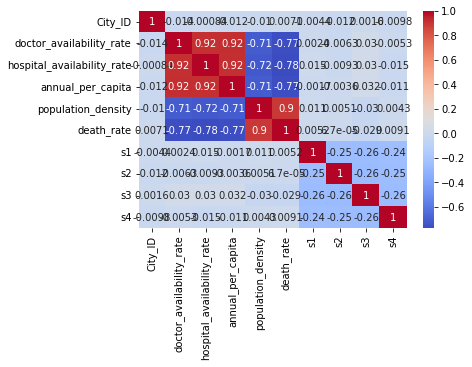

In [32]:
cr['death_rate']

sns.heatmap(cr,annot=True,cmap="coolwarm");

In [34]:
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 773 to 1544
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     1400 non-null   int64  
 1   State                       1400 non-null   object 
 2   doctor_availability_rate    1400 non-null   float64
 3   hospital_availability_rate  1400 non-null   float64
 4   annual_per_capita           1400 non-null   float64
 5   death_rate                  1400 non-null   float64
 6   s1                          1400 non-null   float64
 7   s2                          1400 non-null   float64
 8   s3                          1400 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 109.4+ KB


In [36]:
X_train.drop(['City_ID','s1','s2','s3'],axis=1,inplace=True)

In [37]:

X_test.info()

X_test.drop(['City_ID','s1','s2','s3'],axis=1,inplace=True)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1025 to 1251
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     600 non-null    int64  
 1   State                       600 non-null    object 
 2   doctor_availability_rate    600 non-null    float64
 3   hospital_availability_rate  600 non-null    float64
 4   annual_per_capita           600 non-null    float64
 5   death_rate                  600 non-null    float64
 6   s1                          600 non-null    float64
 7   s2                          600 non-null    float64
 8   s3                          600 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1025 to 1251
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      ----

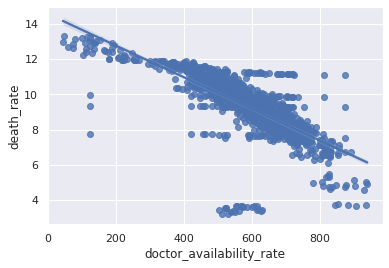

In [38]:
## Check for Linear Relation

import seaborn as sns; sns.set(color_codes=True)

ax = sns.regplot(x=X_train.doctor_availability_rate, y=y_train)


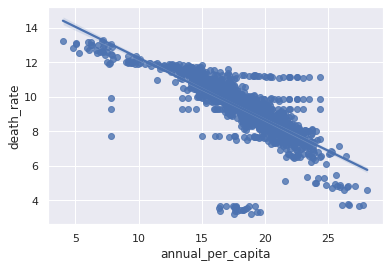

In [39]:
ax = sns.regplot(x=X_train.annual_per_capita, y=y_train)

In [44]:
ax = sns.regplot(x=X_train.population_density, y=y_train)

AttributeError: ignored

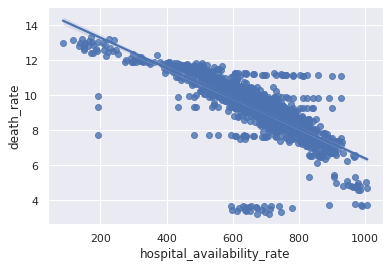

In [41]:
ax = sns.regplot(x=X_train.hospital_availability_rate, y=y_train)

In [47]:
X_train.drop(['State'],axis=1,inplace=True)
X_test.drop(['State'],axis=1,inplace=True)

In [48]:
## building linear Model

from sklearn import linear_model

lr = linear_model.LinearRegression()

# Train the model using the training sets

lr.fit(X_train,y_train)


LinearRegression()

In [49]:
lr.intercept_

-1.0658141036401503e-14

In [50]:
lr.coef_

array([-3.95215550e-18,  5.20417043e-18,  1.74421024e-16,  1.00000000e+00])

In [51]:

## Predicting death_rate for test dataset using model

y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [52]:
res = pd.DataFrame({'y_act':y_test,'y_pred':y_pred})

In [53]:
res

,y_act,y_pred
1025,10.352387,10.352387
1208,9.614960,9.614960
1055,8.223766,8.223766
367,7.471097,7.471097
815,9.245636,9.245636
...,...,...
1718,9.577986,9.577986
1687,10.067912,10.067912
210,9.437314,9.437314
376,8.629955,8.629955


In [54]:
## Evaluate your model using RMSE

import math

math.sqrt(((y_test-y_pred)**2).mean())


1.3354710891244224e-15

In [55]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

1.3354710891244224e-15


In [58]:
#score = r2_score(y_train, y_train_pred)

#print("Training score : ", score)

In [57]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  1.0


In [59]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.638e+29
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:46:28   Log-Likelihood:                 41532.
No. Observations:                1400   AIC:                        -8.305e+04
Df Residuals:                    1395   BIC:                        -8.303e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure


res = res.sort_values(by='y_act')

x1 = np.arange(1,len(y_test)+1)
y1 = res.y_act


<Figure size 720x576 with 0 Axes>

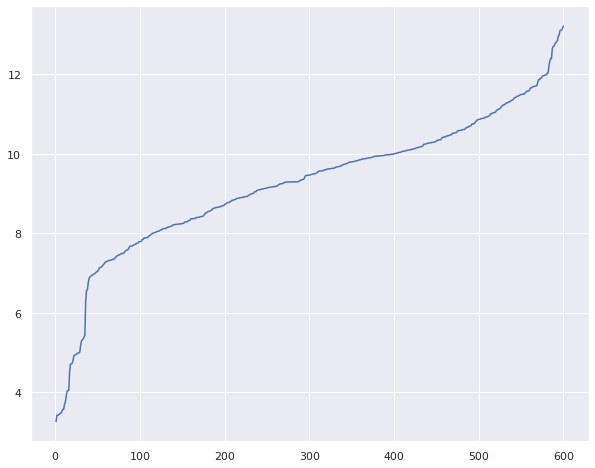

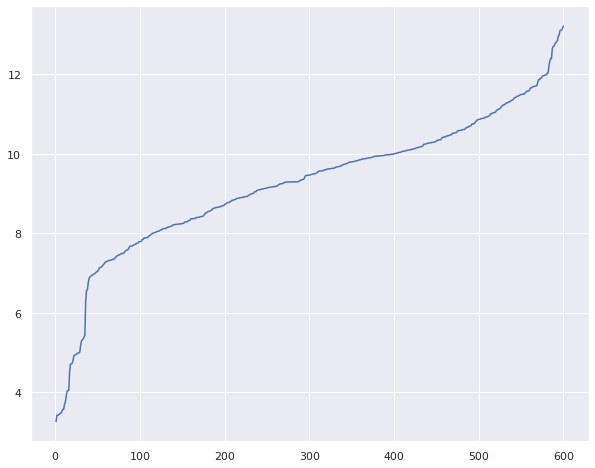

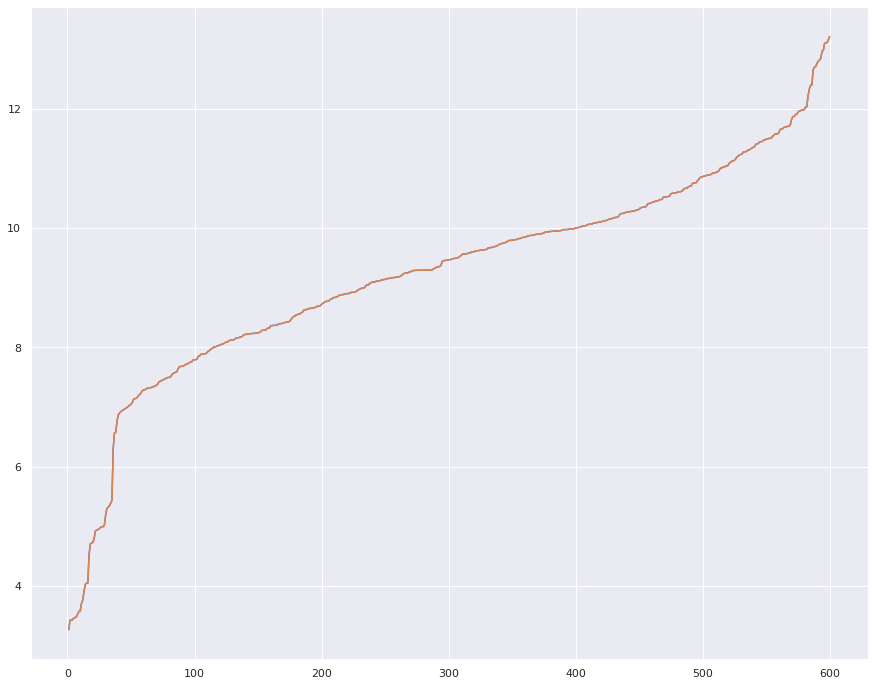

In [62]:
y2 = res.y_pred

figure( figsize=(10, 8))
figure( figsize=(10, 8))
plt.plot(x1, y1)

figure( figsize=(10, 8))
plt.plot(x1,y2)

figure( figsize=(15, 12))
plt.plot(x1, y1,x1,y2)



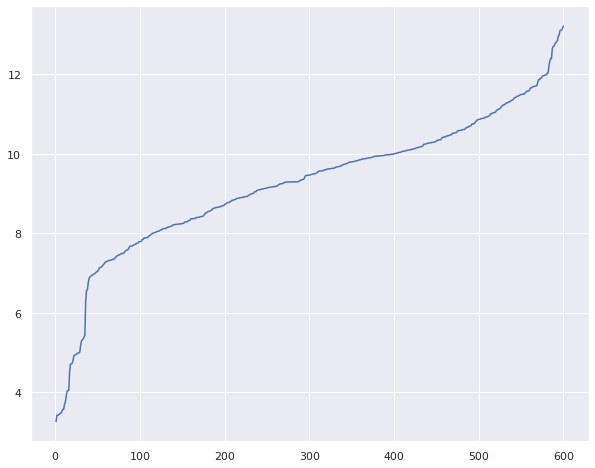

In [63]:
figure( figsize=(10, 8))
plt.plot(x1,y2)


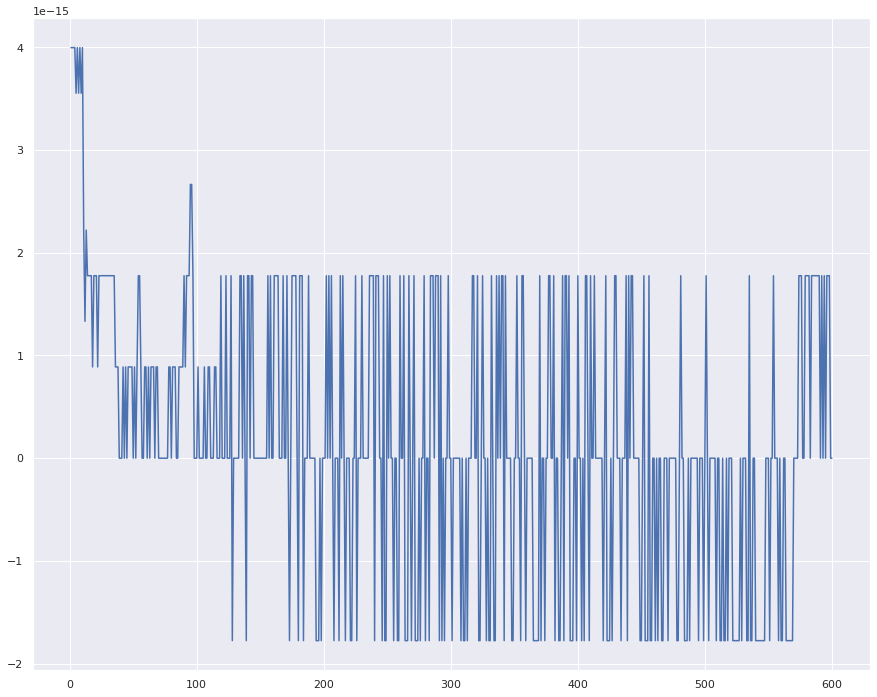

In [64]:
## Analyze the error patterns

figure( figsize=(15, 12))
plt.plot(x1,y1-y2)
